# Exams_Score_Prediction

In this machine learning project, I have collected the dataset from Kaggle and I will be using Machine Learning to predict the scores scored by the students in the exam.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## Loading the dataset

In [18]:
data=pd.read_csv(r"C:\Users\Pratham\Downloads\exams.csv")

# ## Data Visualisation

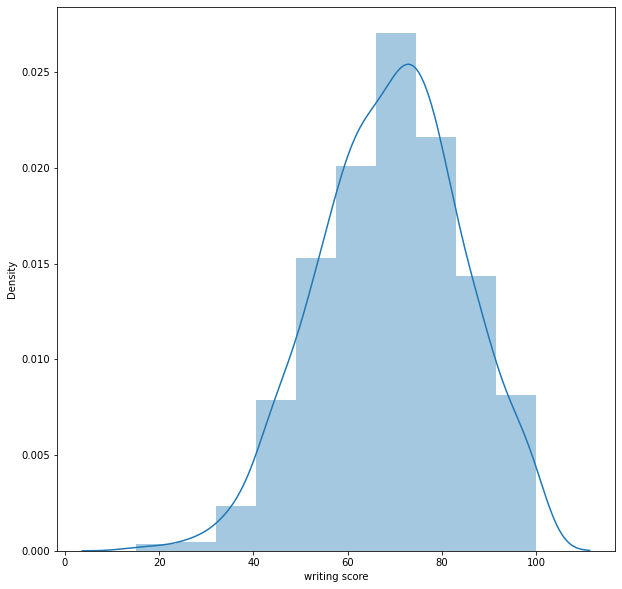

In [19]:
plt.figure(figsize=[10,10])
sns.distplot(data['writing score'], bins=10)
plt.show()

<AxesSubplot:>

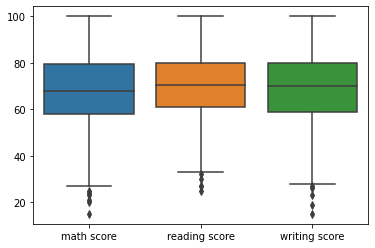

In [20]:
sns.boxplot(data = data)

In [21]:
correlation_matrix=data.corr().round(3)

<AxesSubplot:>

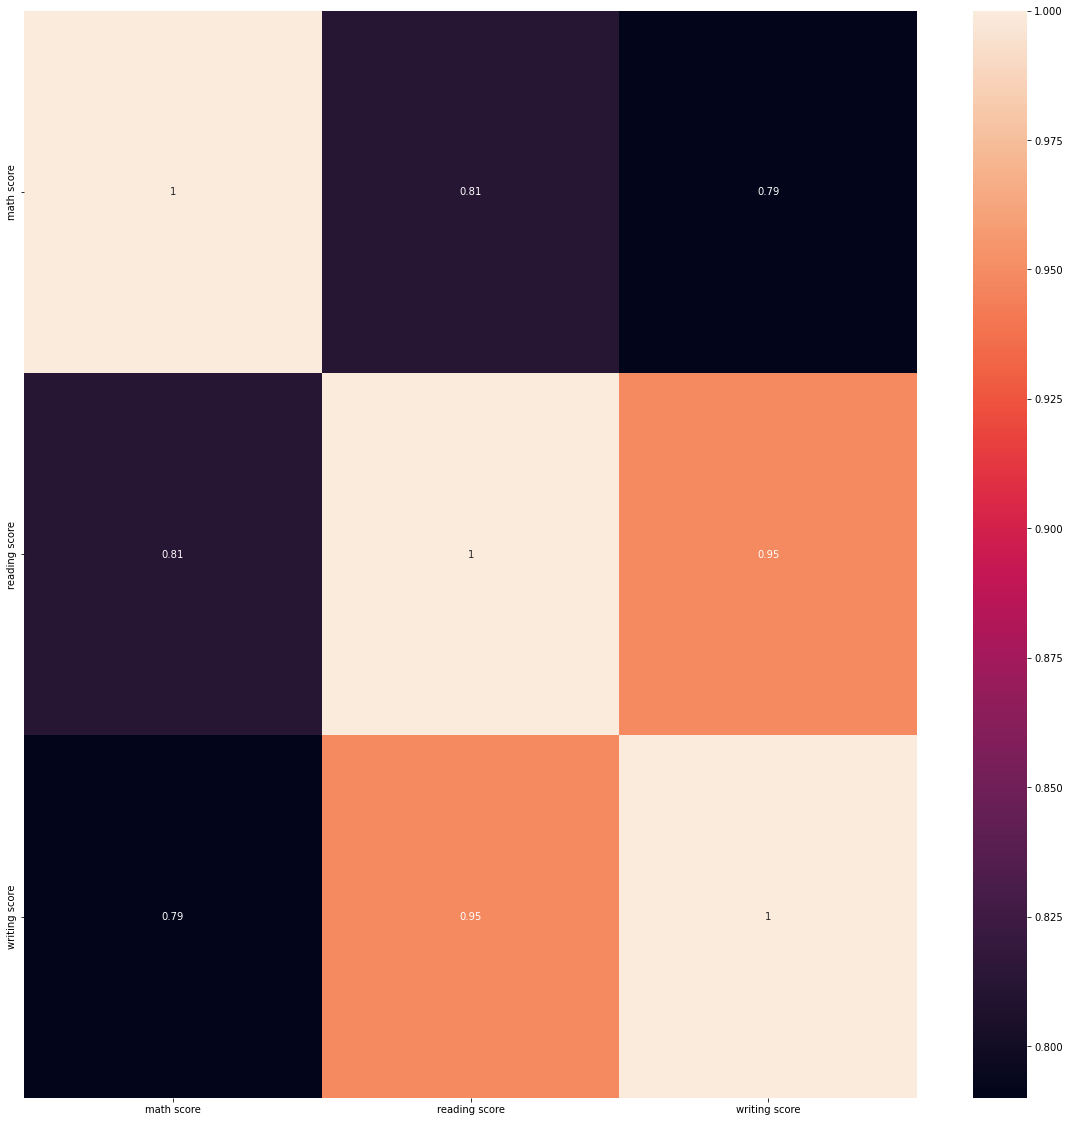

In [22]:
plt.figure(figsize=[20,20])
sns.heatmap(data=correlation_matrix, annot=True)

## Training the model

In [29]:
x = data.drop('writing score', axis=1)
y = data['writing score']

## Splitting Train and Test data

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=65)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 7)
(200, 7)
(800,)
(200,)


## Scaling the data

In [31]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = [ 'math score', 'reading score','writing score']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

## Encoding the data

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()

# create a ColumnTransformer object to apply the OneHotEncoder to the 'gender' column
transformer = ColumnTransformer(transformers=[("OneHot", onehotencoder, ['gender'])])

# fit the ColumnTransformer object to the x_train DataFrame
x_train = transformer.fit_transform(x_train)

x_test = transformer.transform(x_test)

## Training the LinearRegression model

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

## Predicting the model

In [35]:
y_pred_train=lin_reg.predict(x_train)
y_pred_test=lin_reg.predict(x_test)

## Evaluating the model

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
print("mse_train:", mean_squared_error(y_train, y_pred_train))
print("r2_score_train:", r2_score(y_train, y_pred_train))
print("mse_test:", mean_squared_error(y_test, y_pred_test))
print("r2_score_test:", r2_score(y_test, y_pred_test))

mse_train: 0.8744961509265825
r2_score_train: 0.0703170026863591
mse_test: 1.1120346904879899
r2_score_test: 0.08927878786413534


## Support Vector Regressor Classifier

In [50]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr_model = SVR(C=2, gamma="scale", kernel="rbf")
svr_model.fit(x_train, y_train)

y_pred_train = svr_model.predict(x_train)
y_pred_test = svr_model.predict(x_test)

print("mse_train:", mean_squared_error(y_train, y_pred_train))
print("r2_score_train:", r2_score(y_train, y_pred_train))
print("mse_test:", mean_squared_error(y_test, y_pred_test))
print("r2_score_test:", r2_score(y_test, y_pred_test))

mse_train: 0.8768024206186709
r2_score_train: 0.06786519118589385
mse_test: 1.0991016222238874
r2_score_test: 0.09987056140040029


## Decision Tree Regressor Classifier

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtg= DecisionTreeRegressor(max_depth=5, random_state=65)
dtg.fit(x_train , y_train)

y_pred_train=dtg.predict(x_train)
y_pred_test=dtg.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
print("mse_train:", mean_squared_error(y_train, y_pred_train))
print("r2_score_train:", r2_score(y_train, y_pred_train))
print("mse_test:", mean_squared_error(y_test, y_pred_test))
print("r2_score_test:", r2_score(y_test, y_pred_test))

mse_train: 0.8744961509265824
r2_score_train: 0.07031700268635932
mse_test: 1.1120346904879899
r2_score_test: 0.08927878786413534
